In [2]:
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
def process_line(index: int, line: str):
    print(index, line)
    line = line.strip("\n").split(None)

    if len(line) != 3:
        return None
    
    try:
        line[1] = int(line[1],base=16)

        if line[0].lower() == "R".lower():
            color = [1, 0, 0]
        elif line[0].lower() == "W".lower():
            color = [0, 0, 1]


        my_dict = {
            "t": index,
            "op": line[0],
            "addr": line[1],
            "count": line[2],
            "color": color
        }
    except:
        print(line)
        return None
 
     
    return my_dict


In [6]:
file = open("./memcached/data/output")
data = [process_line(index, line) for index, line in enumerate(file)]
file.close()

0 W     0x7ffdd772c8f8  8 

1 W     0x7ffdd772c8f0  8 

2 W     0x7ffdd772c8e8  8 

3 W     0x7ffdd772c8e0  8 

4 W     0x7ffdd772c8d8  8 

5 W     0x7ffdd772c8d0  8 

6 W     0x7ffdd772c8c8  8 

7 W     0x7f4ecf62e5e0  8 

8 R     0x7f4ecf62ee68  8 

9 R     0x7f4ecf62f000  8 

10 W     0x7f4ecf62f9f8  8 

11 W     0x7f4ecf62f9e8  8 

12 W     0x7f4ecf62fa98  8 

13 R     0x7f4ecf62ee78  8 

14 W     0x7f4ecf62fa48  8 

15 R     0x7f4ecf62ee88  8 

16 W     0x7f4ecf62fc88  8 

17 R     0x7f4ecf62ee98  8 

18 W     0x7f4ecf62fa50  8 

19 R     0x7f4ecf62eea8  8 

20 W     0x7f4ecf62fa58  8 

21 R     0x7f4ecf62eeb8  8 

22 W     0x7f4ecf62fa78  8 

23 R     0x7f4ecf62eec8  8 

24 W     0x7f4ecf62fa80  8 

25 R     0x7f4ecf62eed8  8 

26 W     0x7f4ecf62fa40  8 

27 R     0x7f4ecf62eee8  8 

28 W     0x7f4ecf62fa38  8 

29 R     0x7f4ecf62eef8  8 

30 W     0x7f4ecf62fac8  8 

31 R     0x7f4ecf62ef08  8 

32 W     0x7f4ecf62fae0  8 

33 R     0x7f4ecf62ef18  8 

34 W     0x7f4ecf62fa60 

In [33]:
data = [i for i in data if i is not None]

<bound method Series.unique of 0          8
1          8
2          8
3          8
4          8
          ..
1879781    1
1879782    1
1879783    1
1879784    1
1879785    1
Name: count, Length: 1879786, dtype: object>

In [34]:
df = pd.DataFrame(data)
df["count"] = df["count"].astype(int)

ValueError: invalid literal for int() with base 10: '4R'

In [30]:
df["count"].unique()

array(['8', '4', '1', ..., '0x7f4eafc4a76c', '0x7f4eafc4a76d',
       '0x7f4eafc4a76e'], dtype=object)

In [ ]:
df

NameError: name 'df' is not defined

In [ ]:
df["count"].values

NameError: name 'df' is not defined

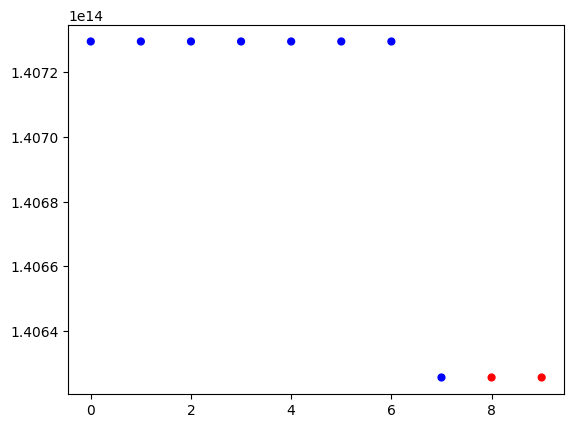

In [ ]:
plt.scatter(x=df["t"].values, y=df["addr"].values, s=df["count"].values*3, c=df["color"].values)